In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Loading the data

eda_data = pd.read_csv("./data/analysed_project.csv")
eda_data.head()

,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,price_in_USD,...,apartment_rooms_missing,apartment_bedrooms_missing,apartment_bathrooms_missing,price_in_USD_missing,building_construction_year_missing,apartment_total_area_m2,apartment_living_area_m2,area_from_title,area_from_title m²,property_type
0,turkey,"mediterranean region, turkey",2021.0,5.0,1.0,3.0,2.0,2.0,120 m²,315209.0,...,0,0,0,0,1,120.0,110,120.0,120.0,apartment
1,turkey,"kalkan, mediterranean region, kas, turkey",2021.0,2.0,4.0,2.0,2.0,1.0,500 m²,1108667.0,...,1,1,1,0,0,500.0,480,500.0,500.0,villa
2,turkey,"mediterranean region, antalya, turkey",2021.0,5.0,2.0,2.0,1.0,1.0,65 m²,173211.0,...,0,0,0,0,1,65.0,60,65.0,65.0,apartment
3,thailand,"chon buri province, pattaya, thailand",2020.0,15.0,5.0,2.0,1.0,1.0,NaN,99900.0,...,0,0,0,0,0,8800.0,40,NaN,NaN,apartment
4,thailand,"chon buri province, pattaya, thailand",2026.0,8.0,3.0,3.0,2.0,1.0,NaN,67000.0,...,0,0,0,0,0,8800.0,36,NaN,NaN,apartment


In [15]:
eda_data.shape

(148536, 22)

Converting the data to lower case and removing unecessary spaces

In [16]:
# Example conversions (adapt names to dataset)
eda_data.columns = eda_data.columns.str.strip().str.lower().str.replace(' ', '_')

#### Checking for NAN

In [17]:
eda_data["price_in_usd"].max()

np.float64(30602832.0)

In [18]:
eda_data.isna().sum()

country                                130
location                               131
building_construction_year               0
building_total_floors                    0
apartment_floor                          0
apartment_rooms                          0
apartment_bedrooms                       0
apartment_bathrooms                      0
apartment_total_area                  6740
price_in_usd                             0
building_total_floors_missing            0
apartment_floor_missing                  0
apartment_rooms_missing                  0
apartment_bedrooms_missing               0
apartment_bathrooms_missing              0
price_in_usd_missing                     0
building_construction_year_missing       0
apartment_total_area_m2                  0
apartment_living_area_m2                 0
area_from_title                       6740
area_from_title_m²                    6740
property_type                         4966
dtype: int64

In [19]:
column=["area_from_title_m²", "apartment_total_area"]
for col in column:
    all_columns = eda_data[col]
    drop_na = all_columns.dropna()
    eda_data[col] = drop_na

#### Check distribution of target

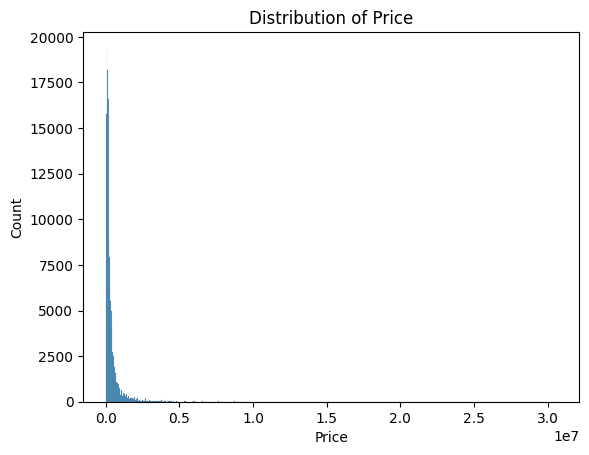

In [20]:
sns.histplot(eda_data["price_in_usd"])
plt.title("Distribution of Price")
plt.savefig(f"Distribution of Price", dpi=300, bbox_inches="tight")
plt.xlabel("Price");

**Since the data set has a lot of higher prices which cause the plot to be heavily right-skewed, to deal with the ouliers it caused, we decided to tranform the price in a log-form ($\log(1 + price)$)**

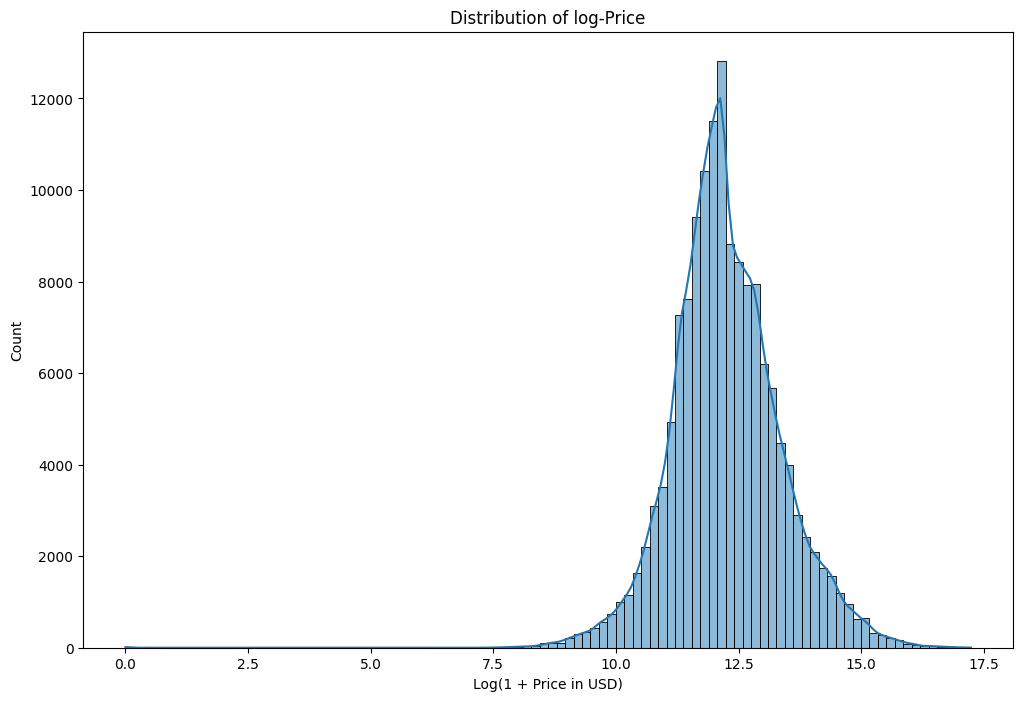

In [21]:
# Add log-transformed price
eda_data["log_price"] = np.log1p(eda_data["price_in_usd"])


# Plotting histogram on the log-transformed price
plt.figure(figsize=(12, 8))
sns.histplot(eda_data["log_price"], bins=100, kde=True)
plt.title("Distribution of log-Price")
plt.xlabel("Log(1 + Price in USD)")
plt.savefig(f"Distribution of log-Price", dpi=300, bbox_inches="tight")
plt.show()

### Observations

**The lower left-skewed listing falls between 7.5 to 11.5 which when converted back to the original (non-log-transformed) price is between to $1810 to $98,710**

**The middle listing which can be regarded as the highesst listings with moderate pricing fall between 11.6 to 14.5 which when converted back to the original (non-log-transformed) price is between $109,100 to $1,982,760**

**The lower right skewed listing falls between 14.6 to 17.5 which when converted back to the original (non-log-transformed) price is between to $2,191,290$$ to  $39,824,790**

#### Checking the distribution of other columns

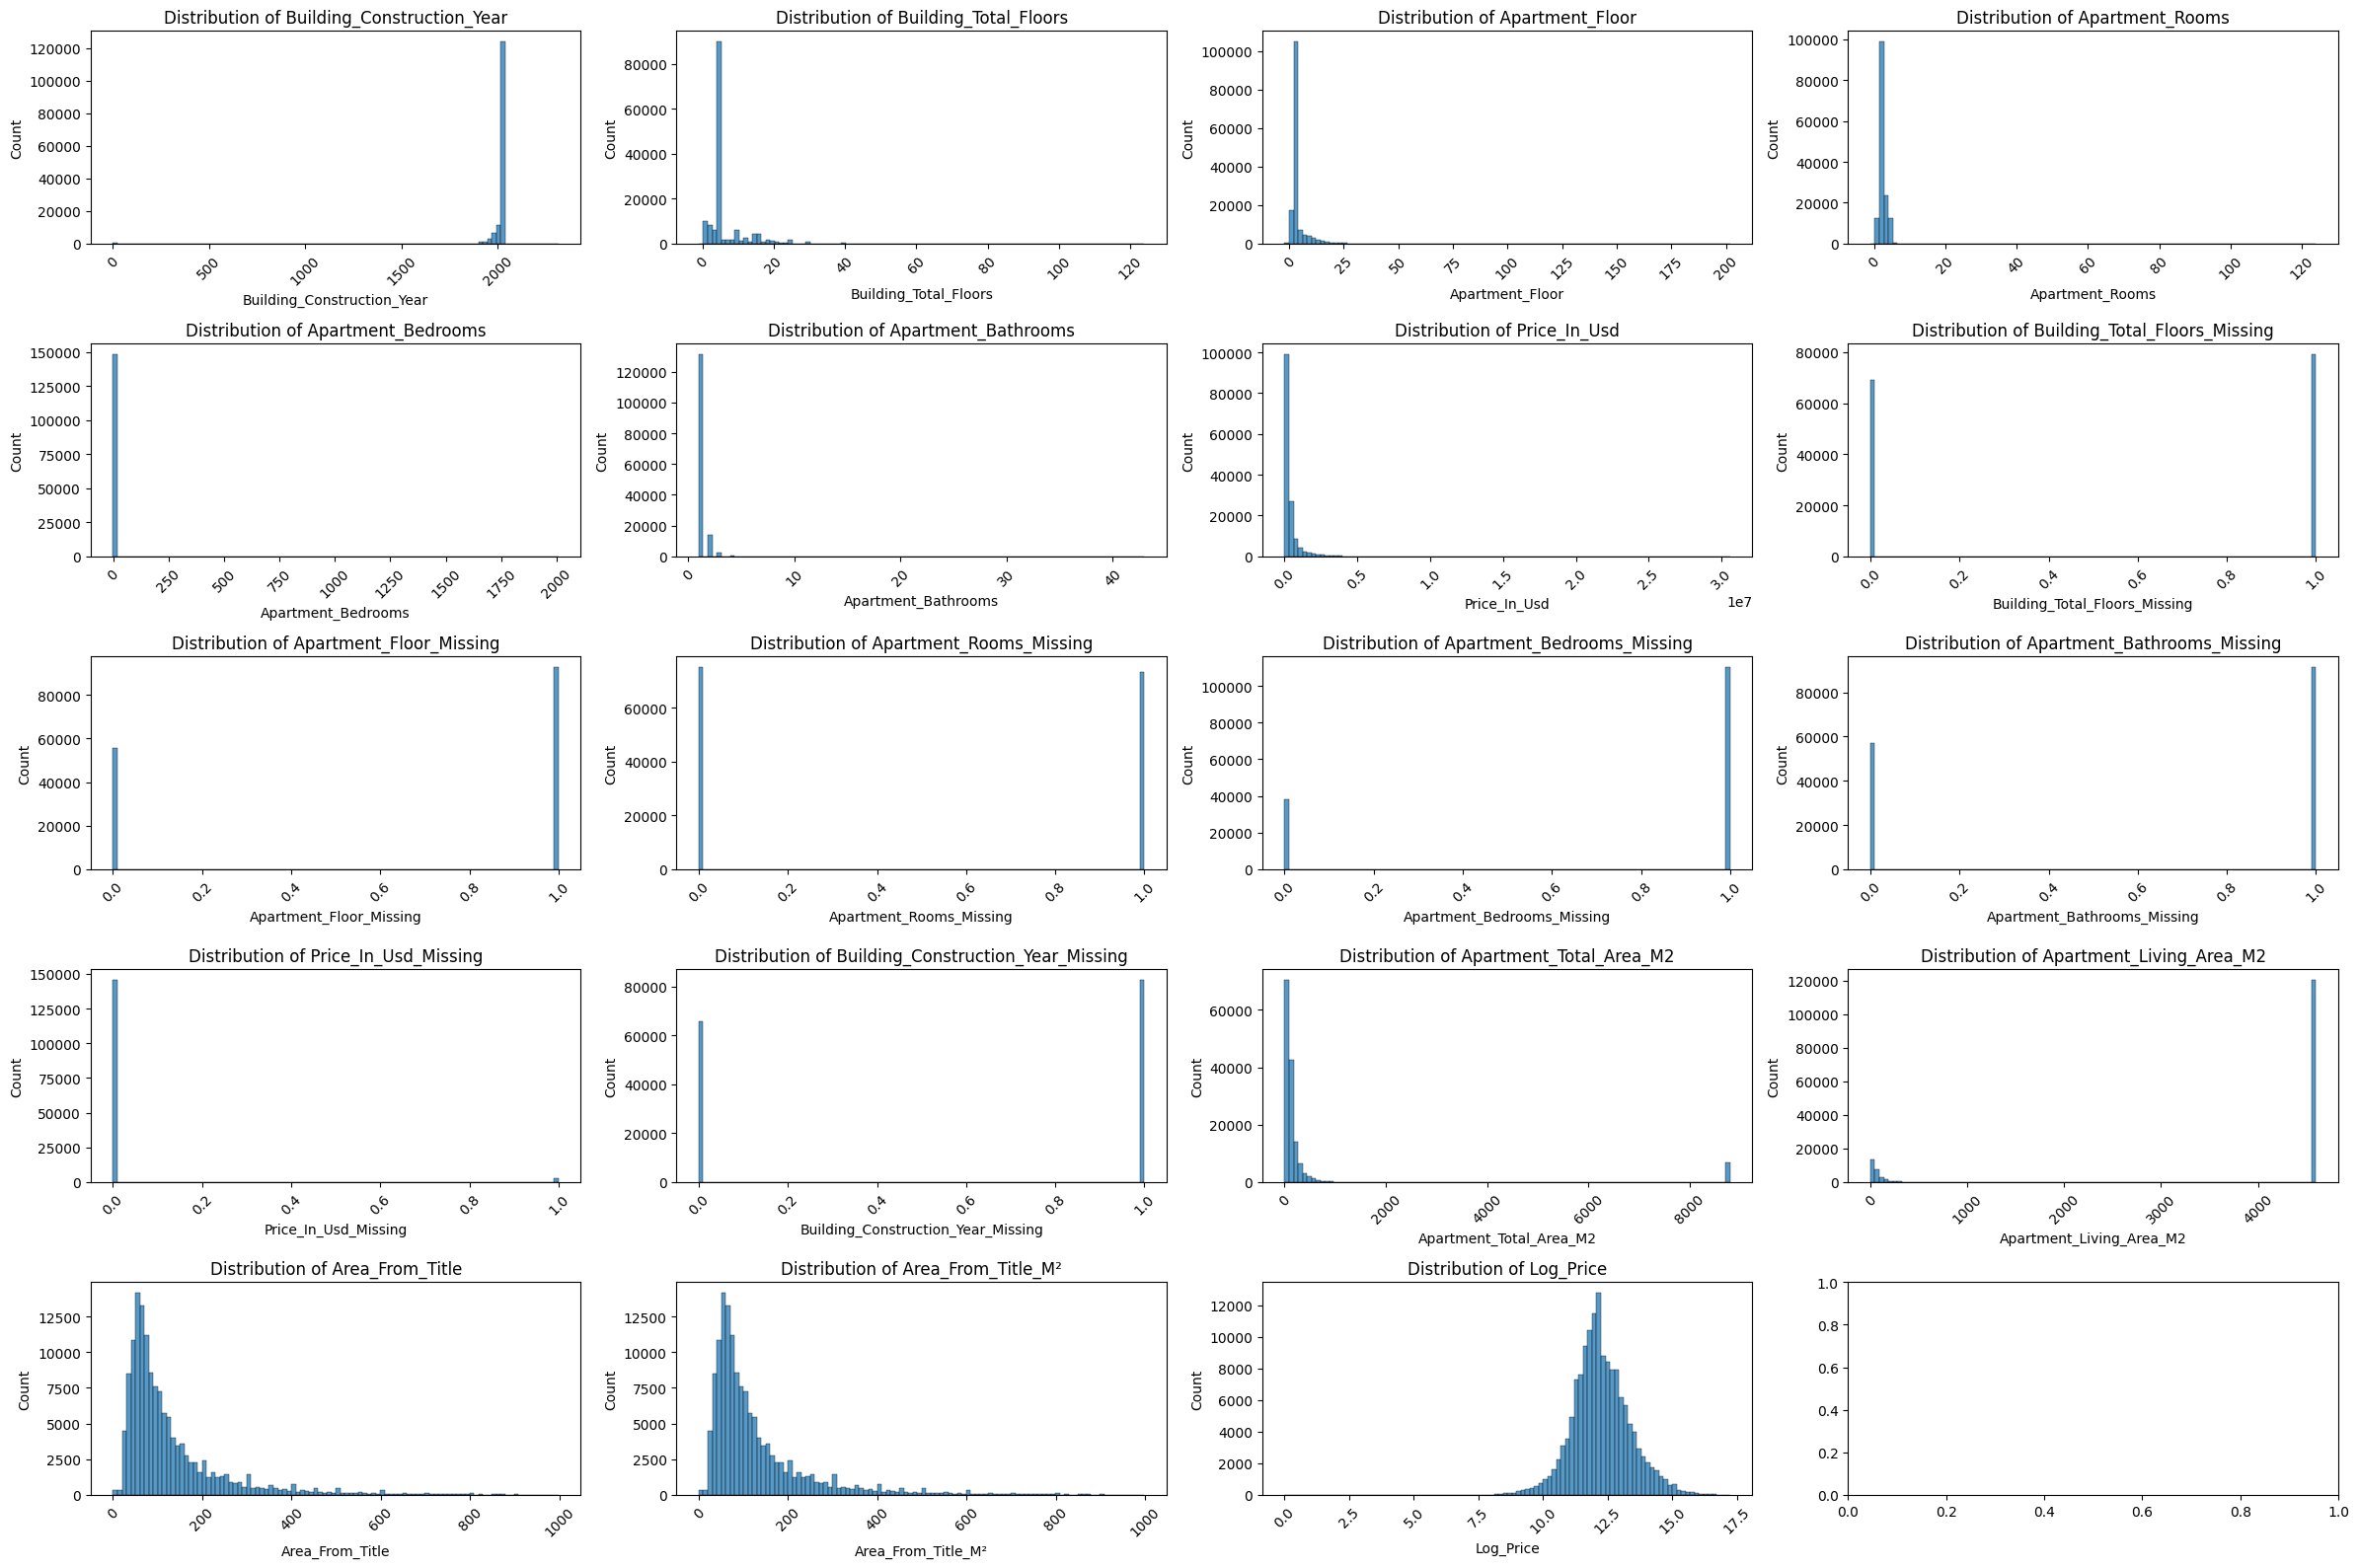

In [35]:
num_col = eda_data.select_dtypes(include="number")
# discorvered my data set is not up to 6 as asigned in the suplot so, i decided to slice/index it before iterating it
num_col_subset = num_col[:19]
# Create suplots
_, ax = plt.subplots(5, 4, figsize=(24, 16))
ax = ax.ravel() # Convert 2D axes array to 1D array

for ax_idx, col in enumerate(num_col_subset): # Generate suplots asigning the sliced variable
    sns.histplot(eda_data[col], ax=ax[ax_idx], bins=100)

    # Label plot title and axis
    ax[ax_idx].set_title(f"Distribution of {col.title()}")
    ax[ax_idx].set_xlabel(f"{col.title()}")
    ax[ax_idx].tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()

**since the index of the data set is in odd form, it throws error because the assigned subplots is 3 x 2 whix is 6 all together**

**Acording to this plots, years of the building start aproximately from 1995 to 2030 and that is the highest of the rest of the years.**
**Building total floor start approximately from 1 to 18 which are the highest in the distribution of the building floor.**
**Number od room starts from 1 to 4 and that is the highest under that distribution**
**Apartment bed-rooms start from 1 to 5 too which are the highest in their own distribution**
**Apartment bathroom starts from 1 to 5 too which are the highest under their distribution**

#### Check distribution of categorical columns

In [27]:
cat_col = eda_data.select_dtypes(exclude="number")
cat_col

,country,location,apartment_total_area,property_type
0,turkey,"mediterranean region, turkey",120 m²,apartment
1,turkey,"kalkan, mediterranean region, kas, turkey",500 m²,villa
2,turkey,"mediterranean region, antalya, turkey",65 m²,apartment
3,thailand,"chon buri province, pattaya, thailand",NaN,apartment
4,thailand,"chon buri province, pattaya, thailand",NaN,apartment
...,...,...,...,...
148531,brazil,waterfront,NaN,apartment
148532,france,business district,NaN,penthouse
148533,usa,downtown,NaN,apartment
148534,uae,waterfront,NaN,apartment


=====Country======
Number of Unique Country: 40
country
turkey             25724
hungary            22325
russia             18491
spain              14939
belarus            14217
greece             12404
montenegro         10702
italy               3335
georgia             3292
uae                 2744
lithuania           2567
latvia              2295
thailand            2224
portugal            2103
croatia             2032
uzbekistan          1952
finland             1751
czech republic      1371
poland              1210
northern cyprus      750
united states        414
austria              237
armenia              110
serbia               104
indonesia            102
cyprus                79
ghana                 75
brazil                72
france                70
south africa          68
egypt                 68
canada                68
nigeria               67
uk                    67
morocco               67
germany               66
japan                 64
kenya              

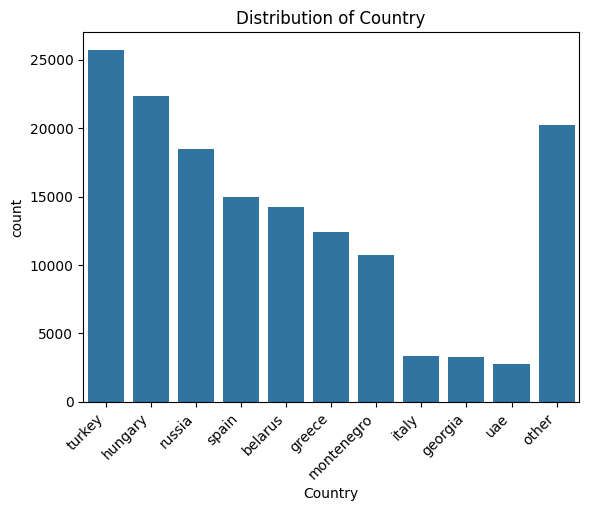

=====Location======
Number of Unique Location: 7451
location
mediterranean region, sekerhane mahallesi, alanya, turkey                                                7244
central federal district, poselenie sosenskoe, novomoskovsky administrative okrug, russia                7023
minsk, belarus                                                                                           4535
central hungary, budapest, komarom-esztergom, hungary                                                    4366
kommunarka, central federal district, poselenie sosenskoe, novomoskovsky administrative okrug, russia    2681
                                                                                                         ... 
hrastina, zagreb county, croatia                                                                            1
grohote, split-dalmatia county, croatia                                                                     1
rab, town of rab, primorje-gorski kotar county, croatia    

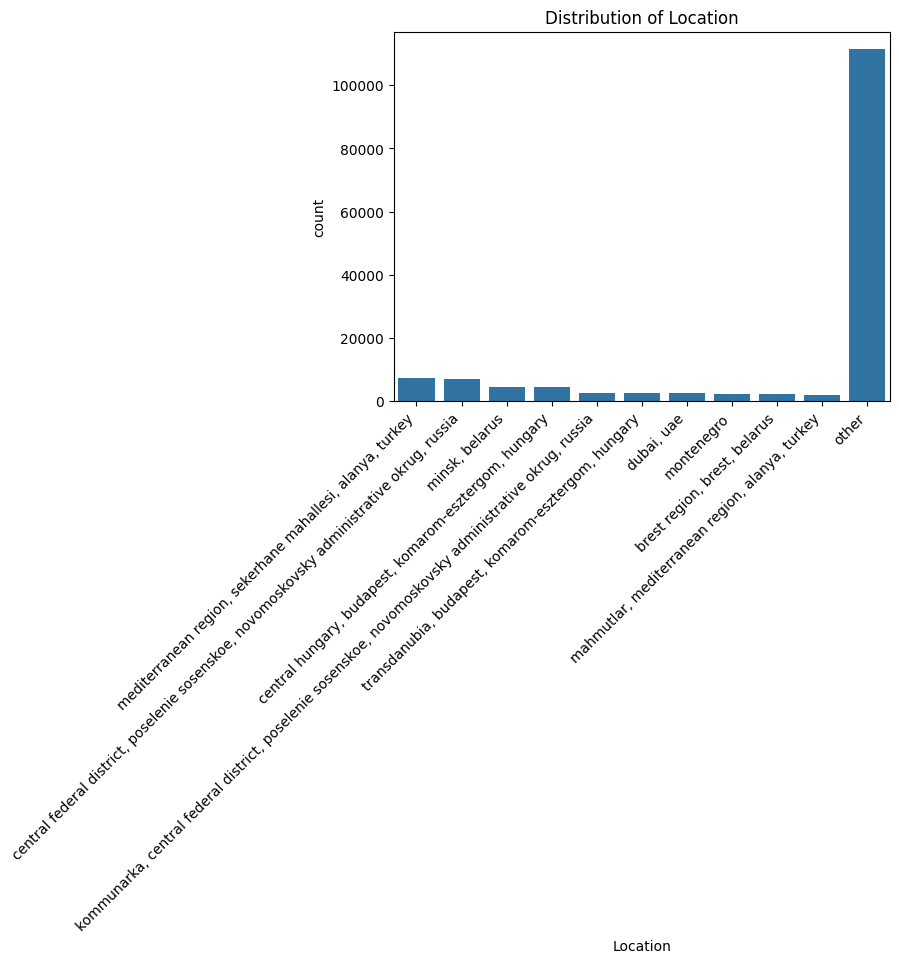

=====Apartment_Total_Area======
Number of Unique Apartment_Total_Area: 1492
apartment_total_area
100 m²       2468
60 m²        2425
50 m²        2261
55 m²        2112
120 m²       2106
             ... 
1 120 m²        1
1 247 m²        1
5 319 m²        1
13 787 m²       1
1 850 m²        1
Name: count, Length: 1492, dtype: int64


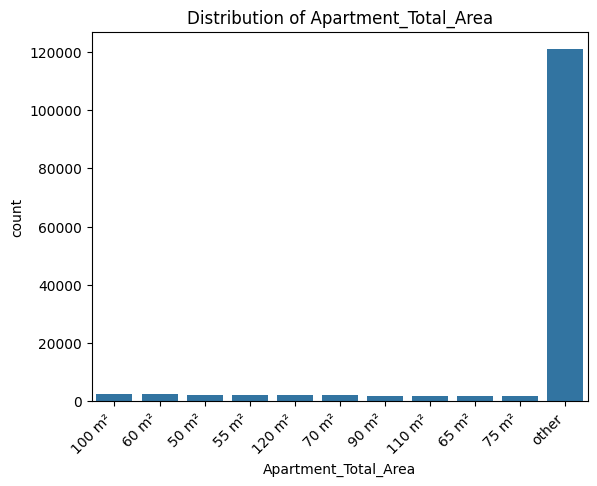

=====Property_Type======
Number of Unique Property_Type: 6
property_type
apartment    92958
house        35011
villa        10243
duplex        2538
penthouse     1656
studio        1164
Name: count, dtype: int64


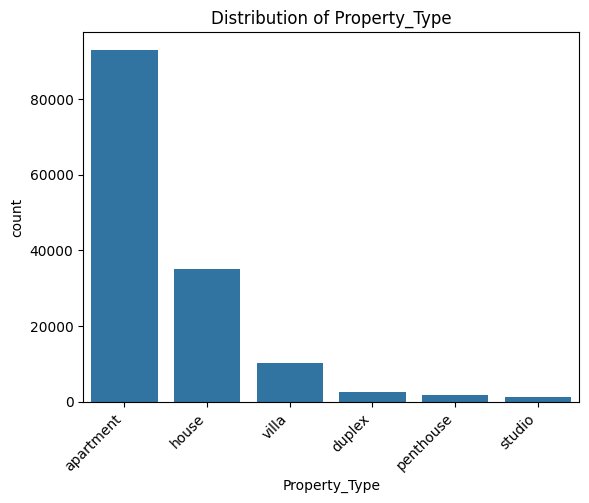

In [28]:
for col in cat_col:
    print(f"====={col.title()}======")
    print(f"Number of Unique {col.title()}:", eda_data[col].nunique())
    counts = eda_data[col].value_counts()
    print(counts)
    
    if len(counts) > 11:
        merged_counts = counts.head(10)
        merged_counts.loc["other"] = counts.iloc[10:].sum()
        counts = merged_counts

        
    sns.barplot(counts)
    plt.title(f"Distribution of {col.title()}")
    plt.xlabel(f"{col.title()}")
    plt.xticks(rotation=45, ha='right') # Rotate labels since category names are long
    plt.savefig(f"Distribution of {col.title()}", dpi=300, bbox_inches="tight")
    plt.show()

#### This shows the proof of how the apartment, house and villa influence th eprice and the model generally

### Plotting the average price value for each numerical columns

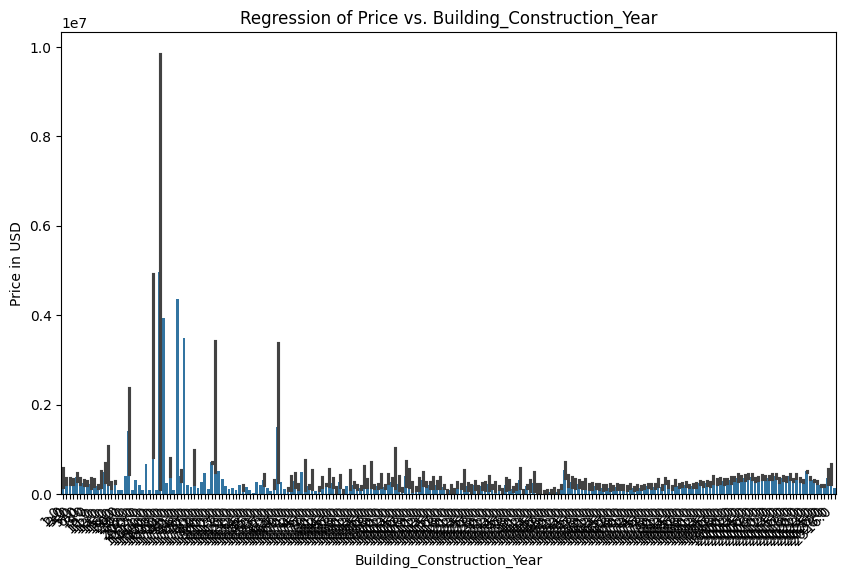

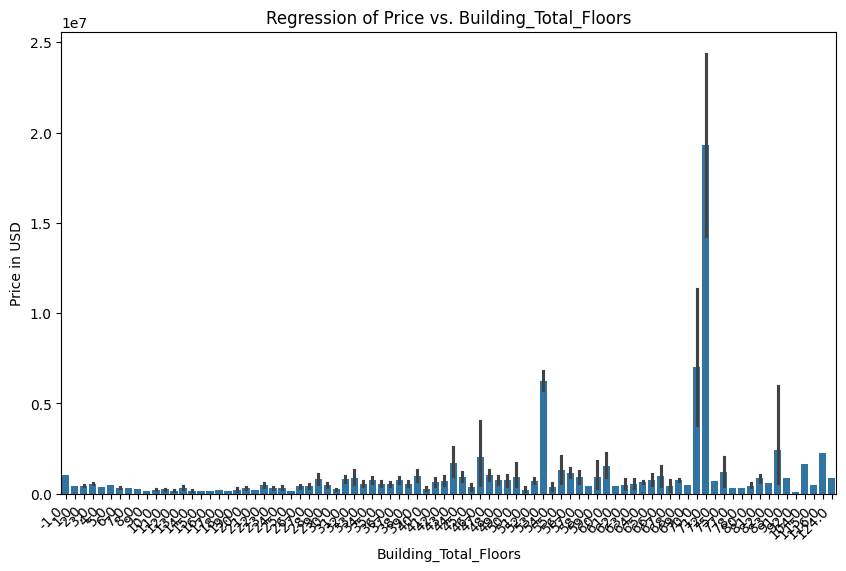

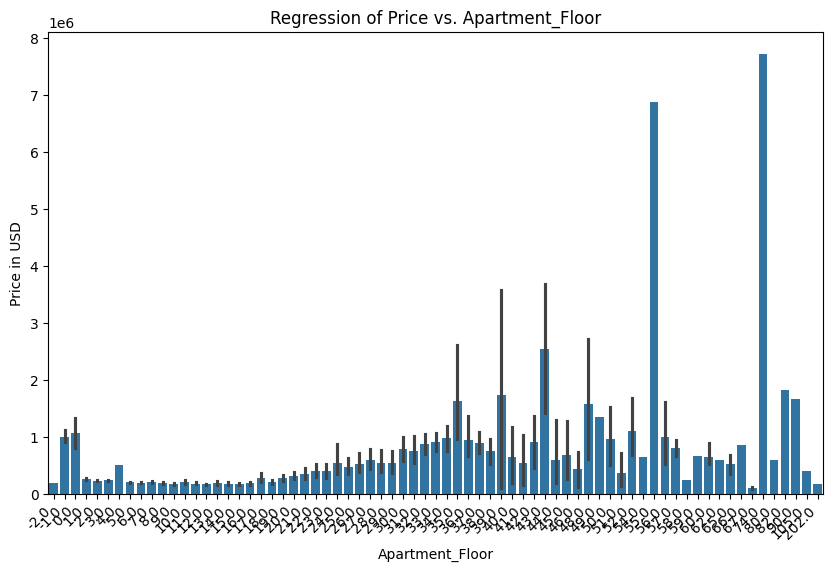

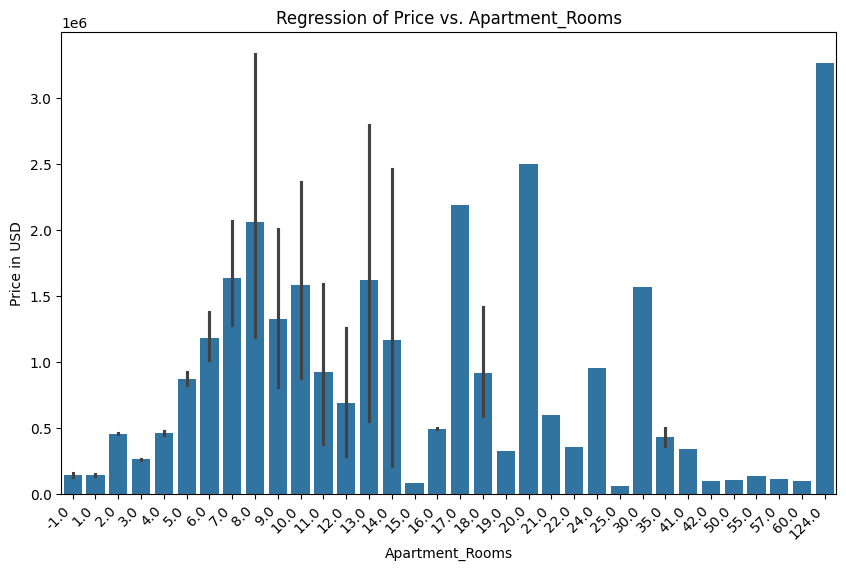

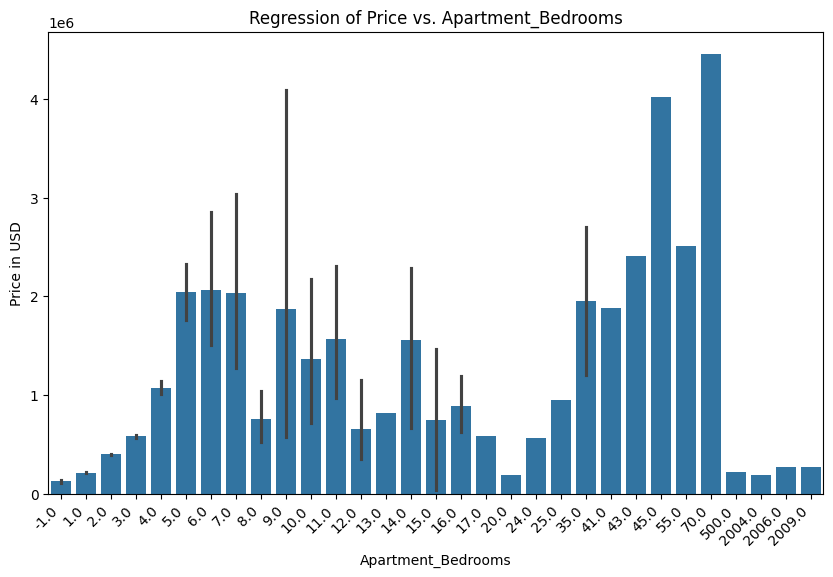

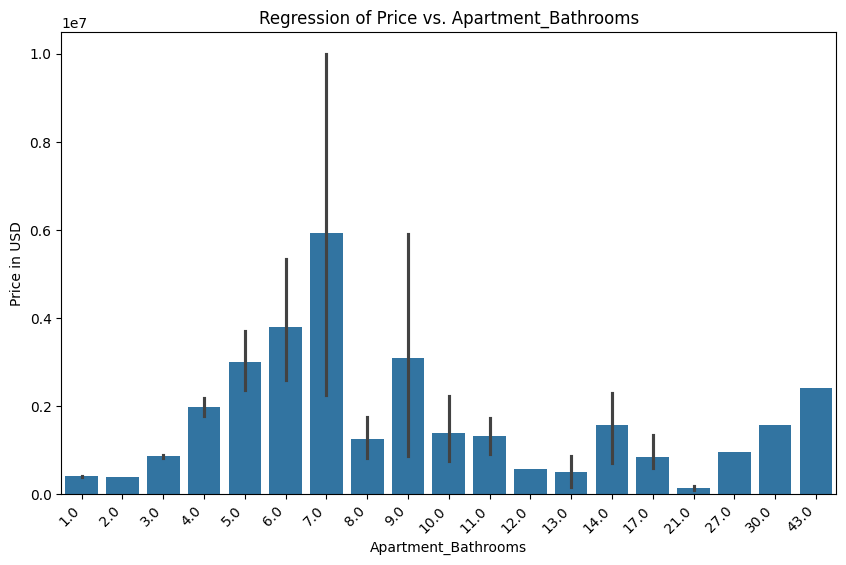

ValueError: cannot insert price_in_usd, already exists

In [29]:
for col in num_col:
    # 1. Calculate the grouped average
    group_average = eda_data.groupby("price_in_usd")[col].median()

    # 3. Convert the Series back to a DataFrame for easier plotting
    plot_data = group_average.reset_index()
    
  # Shows the linear relationship (trend)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y="price_in_usd", data=eda_data) 
    plt.title(f"Regression of Price vs. {col.title()}")
    plt.savefig(f"Distribution of {col.title()}", dpi=300, bbox_inches="tight")
    plt.xticks(rotation=45, ha="right")
    plt.xlabel(col.title())
    plt.ylabel("Price in USD")
    plt.show()

### Since the plot shows the plot of the raw highly skewed raw data, calculating on the median indtead of the mean is a best way to actually show the median price of the categorical columns


Median Price by Country:
country
armenia             190000.0
australia           807934.0
austria             394011.0
belarus              52500.0
brazil              975305.0
canada             1308411.0
croatia             413033.0
cyprus              163482.0
czech republic      217475.0
egypt              1201540.0
finland             191770.0
france             1154956.0
georgia              68630.5
germany            1056095.0
ghana              1064910.0
greece              402163.0
hungary             142297.0
indonesia           265000.0
italy               644845.0
japan               919880.5
kenya              1223454.0
latvia              375289.0
lithuania           140214.0
montenegro          293471.0
morocco            1089976.0
nigeria            1032120.0
northern cyprus     161076.0
poland              266983.0
portugal            675032.0
russia              131830.0
serbia              116947.0
south africa        968757.5
spain               384330.0
thailand 

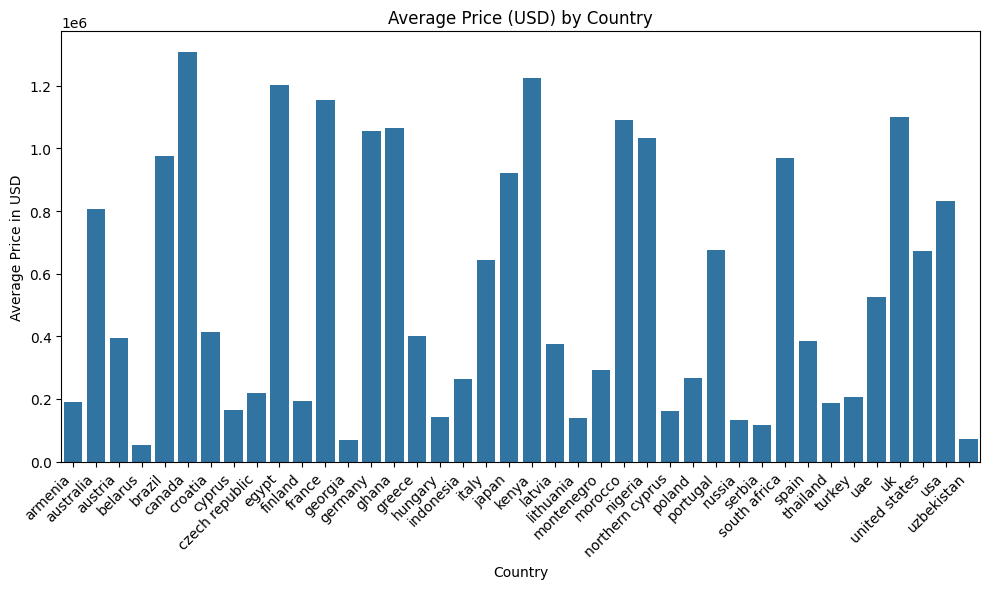


Median Price by Location:
location
"bomboteika" settlement", nea kallikratia, macedonia and thrace, municipality of thessaloniki, central macedonia, greece      297831.0
"lower peace" settlement", nea kallikratia, macedonia and thrace, municipality of thessaloniki, central macedonia, greece     128258.0
"phoenix" settlement", nea kallikratia, macedonia and thrace, municipality of thessaloniki, central macedonia, greece         327887.0
a coruña, santiago de compostela, spain                                                                                      1633053.5
aba, transdanubia, szekesfehervari jaras, fejér, hungary                                                                       81345.0
                                                                                                                               ...    
łódź voivodeship, lodz, poland                                                                                                 85191.0
šunskai, marijampol

C:\Users\USS\AppData\Local\Temp\ipykernel_16604\1747004261.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout() # Ensures labels don't get cut off


In [ ]:
for col in cat_col:
    # 1. Calculate the grouped average: Average price (numerical) for each category (text)
    # The result is a Series where the index is the category and the values are the average price.
    group_average_price = eda_data.groupby(col)["price_in_usd"].median()

    # 2. Print the Series (Optional, remove if you only want the chart)
    print(f"\nMedian Price by {col.title()}:")
    print(group_average_price)

    # 3. Convert the Series to a DataFrame for plotting, setting the index as a column
    plot_data = group_average_price.reset_index()
    
    # 4. Create the Bar Plot
    # The x-axis is the categorical column (e.g., 'Brand', 'Color').
    # The y-axis is the calculated average price in USD.
    plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
    sns.barplot(x=col, y="price_in_usd", data=plot_data)

    plt.title(f"Average Price (USD) by {col.title()}")
    plt.xlabel(col.title())
    plt.ylabel("Average Price in USD")
    plt.xticks(rotation=45, ha='right') # Rotate labels if category names are long
    plt.savefig(f"Distribution of {col.title()}", dpi=300, bbox_inches="tight") # Save the plotted chat
    plt.tight_layout() # Ensures labels don't get cut off
    plt.tight_layout()
    plt.show()

In [ ]:
# 1. Define the numerical predictor columns (exclude the target)
num_predictor_cols = [c for c in num_col if c != 'price_in_usd'] 

# 2. Run the Scatter Plot loop ONLY on predictors:
for col in num_predictor_cols:
    plt.figure(figsize=(10, 6))
    plt.title(f"Relationship between {col.title()} and Price (USD)")
    sns.scatterplot(x=col, y="price_in_usd", data=eda_data)
    plt.tight_layout()
    plt.show()

## Discorveries

**The major influence the data set has comes from the number of room which to say from the hisplot, 2-bed-room has the highest. Based on price, from the hisplot also, prices below $210000 is the highest.**
**Turky has the highest granking in number**
**Villa and aprtments also has highest in the ranking**

### The median is used instead of the mean to provide a robust measure of central tendency, 
### preventing high-priced luxury outliers from skewing the perceived average price for each group. 
### This helps identify true market value differences.